In [3]:
import numpy as np
import pandas as pd

In [5]:
##Read the excel file
df=pd.read_excel("D:/cdrive/desktop/DIVYA/CAREER/guvi/PROJECT/CHICAGOCRIME/Crime_Data.xlsx")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,2007-08-25 09:22:18,074XX N ROGERS AVE,560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,2015-08-17 15:03:40,NaN,NaN,NaN
1,25953,JE240540,2021-05-24 15:06:00,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,2023-11-18 15:39:49,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,2021-06-26 09:24:00,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,2023-11-18 15:39:49,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,2023-11-09 07:30:00,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,5,1162518.0,1925906.0,2023,2023-11-18 15:39:49,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,2023-12-09 15:41:24,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [7]:
# General information about the dataset 
# including data types and missing information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549999 entries, 0 to 549998
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    549999 non-null  int64         
 1   Case Number           549999 non-null  object        
 2   Date                  549999 non-null  datetime64[ns]
 3   Block                 549999 non-null  object        
 4   IUCR                  549999 non-null  object        
 5   Primary Type          549999 non-null  object        
 6   Description           549999 non-null  object        
 7   Location Description  548326 non-null  object        
 8   Arrest                549999 non-null  bool          
 9   Domestic              549999 non-null  bool          
 10  Beat                  549999 non-null  int64         
 11  District              549999 non-null  int64         
 12  Ward                  213674 non-null  float64       
 13 

In [ ]:
##the following column has null values
Location Description  548326 non-null  object  
Ward                  213674 non-null  float64   
Community Area        215093 non-null  float64   
X Coordinate          543087 non-null  float64       
Y Coordinate          543087 non-null  float64       
Latitude              543087 non-null  float64       
Longitude             543087 non-null  float64       
Location              543087 non-null  object      

In [9]:
df['Community Area'].nunique()

77

In [11]:
##filling community area with mode value
df['Community Area'] = df['Community Area'].fillna(df['Community Area'].mode()[0])


In [13]:
# Verify null values are handled
print(df['Community Area'].isnull().sum())

0


In [15]:
##changing Location Description as unknown for null values
df['Location Description'].nunique()

210

In [17]:
df['Location Description']=df['Location Description'].fillna('Unknown')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549999 entries, 0 to 549998
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    549999 non-null  int64         
 1   Case Number           549999 non-null  object        
 2   Date                  549999 non-null  datetime64[ns]
 3   Block                 549999 non-null  object        
 4   IUCR                  549999 non-null  object        
 5   Primary Type          549999 non-null  object        
 6   Description           549999 non-null  object        
 7   Location Description  549999 non-null  object        
 8   Arrest                549999 non-null  bool          
 9   Domestic              549999 non-null  bool          
 10  Beat                  549999 non-null  int64         
 11  District              549999 non-null  int64         
 12  Ward                  213674 non-null  float64       
 13 

In [21]:
df['Ward'].nunique()

50

In [23]:
null_rows=df[df[['Latitude', 'Longitude','Location', 'X Coordinate', 'Y Coordinate']].isnull().all(axis=1)]
print (null_rows)

              ID Case Number                Date                 Block  IUCR  \
0        5741943    HN549294 2007-08-25 09:22:18    074XX N ROGERS AVE   560   
5        1930689    HH109118 2002-01-05 21:24:00        007XX E 103 ST   820   
27      12416972    JE293535 2020-10-01 00:01:00       031XX W 53RD PL  1753   
28      12416974    JE293464 2011-08-10 00:01:00       031XX W 53RD PL  1753   
29      12536164    JE439378 2015-09-24 00:00:00       031XX W 53RD PL  1753   
...          ...         ...                 ...                   ...   ...   
549319   1745537     G555046 2001-09-16 02:40:00         041XX W 42 ST  1220   
549444   1674254     G463536 2001-08-06 00:30:00     118XX S CHURCH ST   460   
549622   1803852     G623405 2001-10-16 23:39:19      066XX W GRAND AV   460   
549865   1721905     G524424 2001-09-01 21:00:00     020XX S ARCHER AV   810   
549873   1672685     G457581 2001-08-03 12:29:00  067XX S GREENWOOD AV   460   

                      Primary Type     

In [ ]:
'''
Total 6912 columns does not have 'Latitude', 'Longitude','Location', 'X Coordinate', 'Y Coordinate'
values. Making these values as -1  and location to unknown since they represent less than 2% of data
'''

In [25]:
# Assign -1 to numeric columns and 'Unknown' to string column
df.loc[df[['Latitude', 'Longitude', 'X Coordinate', 'Y Coordinate']].isnull().all(axis=1), ['Latitude', 'Longitude','X Coordinate', 'Y Coordinate']] = -1
##df.loc[df[['Latitude', 'Longitude', 'Location','X Coordinate', 'Y Coordinate']].isnull().all(axis=1), 'Location'] = 'Unknown'


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549999 entries, 0 to 549998
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    549999 non-null  int64         
 1   Case Number           549999 non-null  object        
 2   Date                  549999 non-null  datetime64[ns]
 3   Block                 549999 non-null  object        
 4   IUCR                  549999 non-null  object        
 5   Primary Type          549999 non-null  object        
 6   Description           549999 non-null  object        
 7   Location Description  549999 non-null  object        
 8   Arrest                549999 non-null  bool          
 9   Domestic              549999 non-null  bool          
 10  Beat                  549999 non-null  int64         
 11  District              549999 non-null  int64         
 12  Ward                  213674 non-null  float64       
 13 

In [29]:
filtered_rows = df[
    (df['Latitude'] == -1) & 
    (df['Longitude'] == -1) & 
    (df['X Coordinate'] == -1) & 
    (df['Y Coordinate'] == -1)
]

# Print the filtered rows
print(filtered_rows)

              ID Case Number                Date                 Block  IUCR  \
0        5741943    HN549294 2007-08-25 09:22:18    074XX N ROGERS AVE   560   
5        1930689    HH109118 2002-01-05 21:24:00        007XX E 103 ST   820   
27      12416972    JE293535 2020-10-01 00:01:00       031XX W 53RD PL  1753   
28      12416974    JE293464 2011-08-10 00:01:00       031XX W 53RD PL  1753   
29      12536164    JE439378 2015-09-24 00:00:00       031XX W 53RD PL  1753   
...          ...         ...                 ...                   ...   ...   
549319   1745537     G555046 2001-09-16 02:40:00         041XX W 42 ST  1220   
549444   1674254     G463536 2001-08-06 00:30:00     118XX S CHURCH ST   460   
549622   1803852     G623405 2001-10-16 23:39:19      066XX W GRAND AV   460   
549865   1721905     G524424 2001-09-01 21:00:00     020XX S ARCHER AV   810   
549873   1672685     G457581 2001-08-03 12:29:00  067XX S GREENWOOD AV   460   

                      Primary Type     

In [127]:
df.loc[
    (df['Latitude'] == -1) & 
    (df['Longitude'] == -1) & 
    (df['X Coordinate'] == -1) & 
    (df['Y Coordinate'] == -1), 
    'Location'
] = 'Unknown'

# Verify the changes
print(df.loc[df['Location'] == 'Unknown'])

              ID Case Number                Date                 Block  IUCR  \
0        5741943    HN549294 2007-08-25 09:22:18    074XX N ROGERS AVE   560   
5        1930689    HH109118 2002-01-05 21:24:00        007XX E 103 ST   820   
27      12416972    JE293535 2020-10-01 00:01:00       031XX W 53RD PL  1753   
28      12416974    JE293464 2011-08-10 00:01:00       031XX W 53RD PL  1753   
29      12536164    JE439378 2015-09-24 00:00:00       031XX W 53RD PL  1753   
...          ...         ...                 ...                   ...   ...   
549319   1745537     G555046 2001-09-16 02:40:00         041XX W 42 ST  1220   
549444   1674254     G463536 2001-08-06 00:30:00     118XX S CHURCH ST   460   
549622   1803852     G623405 2001-10-16 23:39:19      066XX W GRAND AV   460   
549865   1721905     G524424 2001-09-01 21:00:00     020XX S ARCHER AV   810   
549873   1672685     G457581 2001-08-03 12:29:00  067XX S GREENWOOD AV   460   

                      Primary Type     

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549999 entries, 0 to 549998
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    549999 non-null  int64         
 1   Case Number           549999 non-null  object        
 2   Date                  549999 non-null  datetime64[ns]
 3   Block                 549999 non-null  object        
 4   IUCR                  549999 non-null  object        
 5   Primary Type          549999 non-null  object        
 6   Description           549999 non-null  object        
 7   Location Description  549999 non-null  object        
 8   Arrest                549999 non-null  bool          
 9   Domestic              549999 non-null  bool          
 10  Beat                  549999 non-null  int64         
 11  District              549999 non-null  int64         
 12  Ward                  213674 non-null  float64       
 13 

In [33]:
df['Ward'].nunique()

50

In [35]:
##Dropping Ward column since it has too many null values and it is not an essential column for visualization
df.drop('Ward', axis=1, inplace=True)
print(df.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [37]:
# Statistical Analysis
df.describe()

,ID,Date,Beat,District,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude
count,5.499990e+05,549999,549999.000000,549999.000000,549999.000000,5.499990e+05,5.499990e+05,549999.000000,549999,549999.000000,549999.000000
mean,5.748380e+06,2009-10-05 02:55:46.740996096,1200.364957,11.339984,29.597303,1.150149e+06,1.863240e+06,2009.336524,2018-12-22 08:36:46.706199552,41.306938,-86.581540
min,6.340000e+02,2001-01-01 00:00:00,111.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00,2001.000000,2006-03-31 22:03:38,-1.000000,-91.686566
25%,1.477682e+06,2001-04-21 02:04:25.500000,621.000000,6.000000,25.000000,1.153177e+06,1.859548e+06,2001.000000,2015-08-17 15:03:40,41.769961,-87.710552
50%,1.651346e+06,2001-08-04 19:00:00,1113.000000,10.000000,25.000000,1.166183e+06,1.891309e+06,2001.000000,2015-08-17 15:03:40,41.857362,-87.663942
75%,1.327660e+07,2023-11-07 23:00:00,1813.000000,17.000000,25.000000,1.176389e+06,1.910146e+06,2023.000000,2023-11-24 15:40:59,41.909314,-87.627340
max,1.348547e+07,2024-05-30 00:00:00,2535.000000,31.000000,77.000000,1.205119e+06,1.951610e+06,2024.000000,2024-06-06 15:41:55,42.022878,-1.000000
std,5.669909e+06,NaN,712.157469,7.047229,14.808441,1.311069e+05,2.131093e+05,10.728233,NaN,4.773843,9.655133


In [ ]:
'''
From the date column it is observed the year ranges from 2001-2024.
'''

In [135]:
# Getting an idea whether there are any null values in the data or not
df.isnull().sum().any()

False

In [ ]:
## Null values  not present

In [137]:
#Getting an idea about the duplicates
df.duplicated().sum()

0

In [ ]:
## No duplicates present

In [143]:
##To export the cleaned data to excel 
# Specify the file path with .xlsx extension
df.to_excel('D:/cdrive/desktop/DIVYA/CAREER/guvi/PROJECT/CHICAGOCRIME_cleaned.xlsx', index=True)


In [43]:
##creating correlation matrix only for numeric columns
numeric_df = df.select_dtypes(include='number')  # Keep only numeric columns
correlation_matrix = numeric_df.corr()  # Compute correlation matrix
print(correlation_matrix)

                      ID      Beat  District  Community Area  X Coordinate  \
ID              1.000000 -0.033412  0.011859        0.323041     -0.067990   
Beat           -0.033412  1.000000  0.930283       -0.287103     -0.060016   
District        0.011859  0.930283  1.000000       -0.271668     -0.063642   
Community Area  0.323041 -0.287103 -0.271668        1.000000     -0.021449   
X Coordinate   -0.067990 -0.060016 -0.063642       -0.021449      1.000000   
Y Coordinate   -0.066100  0.094230  0.099095       -0.094628      0.972018   
Year            0.971433 -0.043106  0.003979        0.352804     -0.038687   
Latitude       -0.070280  0.011897  0.015727       -0.041599      0.988969   
Longitude       0.070844 -0.003312 -0.007348        0.034705     -0.988660   

                Y Coordinate      Year  Latitude  Longitude  
ID                 -0.066100  0.971433 -0.070280   0.070844  
Beat                0.094230 -0.043106  0.011897  -0.003312  
District            0.099095  0.0

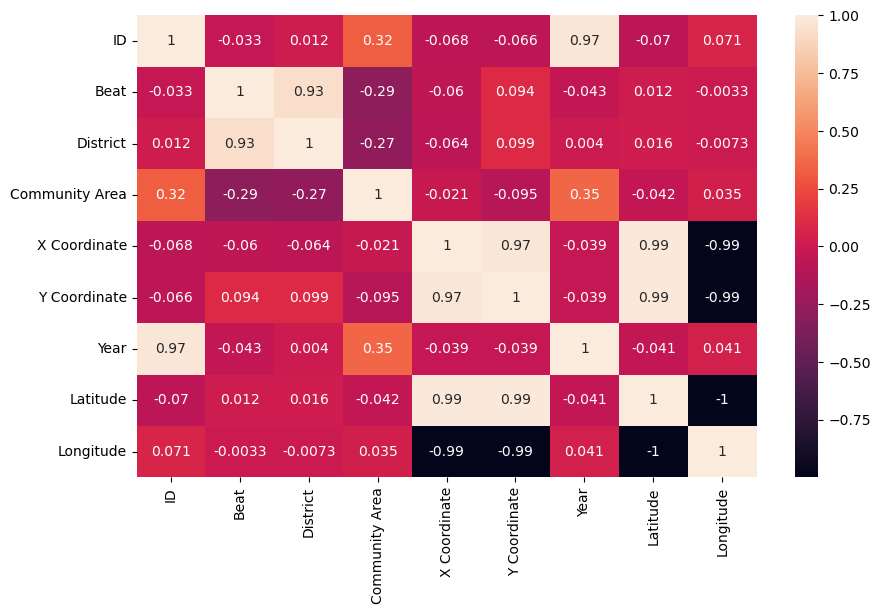

In [47]:
##heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

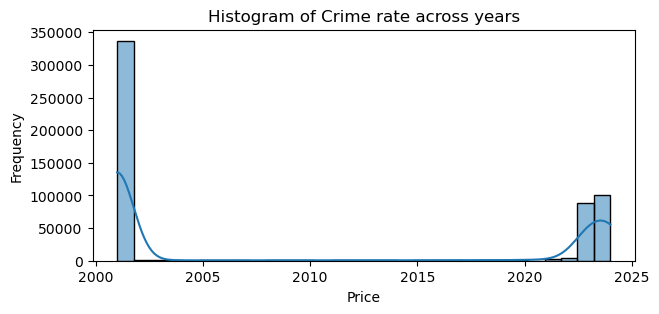

In [49]:
##Data Visualization
plt.figure(figsize = (7, 3))
sns.histplot(df['Year'], bins = 30, kde = True)
plt.title('Histogram of Crime rate across years')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''
Crime rate was significantly higher in 2000 and 
reduced over years and increased after 2022
'''